In [36]:
RATES = [
    [1.00, 0.48, 1.52, 0.71],
    [2.05, 1.00, 3.26, 1.56],
    [0.64, 0.30, 1.00, 0.46],
    [1.41, 0.61, 2.08, 1.00],
]

NAMES = ["pizza", "wasabi", "snow", "shells"]
START = 3
assert NAMES[START] == "shells"

MAX_TRADES = 5

In [37]:
def resolve(sequence: int):
    amt = 1.0
    for i in range(len(sequence) - 1):
        amt *= RATES[sequence[i]][sequence[i + 1]]
    return amt

In [38]:
def generate_sequences(trades: int, start: int):
    res = []
    def f(cur, n):
        if cur[-1] == start:
            res.append(cur)
        if n == 0:
            return
        for i in range(len(NAMES)):
            if i == cur[-1]:
                continue
            f(cur + [i], n - 1)
    f([start], trades)
    return res

all_sequences = generate_sequences(MAX_TRADES, START)
print(len(all_sequences))

91


In [39]:
import pandas as pd
import numpy as np

In [40]:
sequences_df = pd.DataFrame({"sequence": all_sequences})
sequences_df["money"] = sequences_df.apply(lambda r: resolve(r["sequence"]), axis=1)
sequences_df.sort_values("money", ascending=False, inplace=True)
sequences_df.reset_index(inplace=True, drop=True)
sequences_df

,sequence,money
0,"[3, 0, 1, 3, 0, 3]",1.056969
1,"[3, 0, 3, 0, 1, 3]",1.056969
2,"[3, 0, 1, 3]",1.055808
3,"[3, 0, 1, 0, 1, 3]",1.038915
4,"[3, 0, 1, 2, 1, 3]",1.032580
...,...,...
86,"[3, 1, 0, 2, 0, 3]",0.863705
87,"[3, 1, 0, 3, 2, 3]",0.849500
88,"[3, 2, 3, 1, 0, 3]",0.849500
89,"[3, 1, 3, 1, 0, 3]",0.844883


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

<Axes: ylabel='Frequency'>

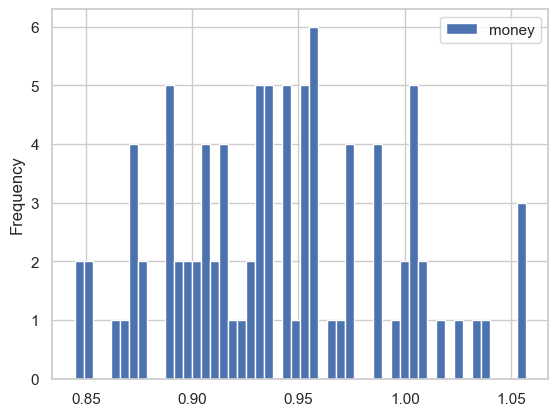

In [42]:
sequences_df.plot(y="money", kind="hist", bins=50)

In [44]:
sequences_df[sequences_df["money"] >= 1]

,sequence,money
0,"[3, 0, 1, 3, 0, 3]",1.056969
1,"[3, 0, 3, 0, 1, 3]",1.056969
2,"[3, 0, 1, 3]",1.055808
3,"[3, 0, 1, 0, 1, 3]",1.038915
4,"[3, 0, 1, 2, 1, 3]",1.032580
5,"[3, 0, 2, 0, 1, 3]",1.027090
6,"[3, 0, 1, 2, 3]",1.014929
7,"[3, 0, 1, 3, 2, 3]",1.010197
8,"[3, 2, 3, 0, 1, 3]",1.010197
9,"[3, 0, 1, 3, 1, 3]",1.004707
